## Иморты:

In [15]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import os
import warnings
import time
import tensorflow as tf
from tensorflow.keras.datasets import mnist as keras_mnist
from sklearn.neighbors import KNeighborsClassifier as KNNClassifier
from sklearn.decomposition import PCA as PrincipalComponentAnalysis
%matplotlib inline

## Загрузка данных и подготовка

In [16]:
# verbose
print("Загрузка и подготовка набора данных")
print("...")
# Загрузка данных
dataset_train, dataset_test = keras_mnist.load_data()

# Подготовка обучающих данных
images_train_original = dataset_train[0]
images_train_reshaped = images_train_original.reshape(-1, 28, 28)
labels_train = dataset_train[1]

# Подготовка проверочных данных
images_test_original = dataset_test[0]
images_test_reshaped = images_test_original.reshape(-1, 28, 28)
labels_test = dataset_test[1]

# Подготовка обучающих данных
images_train_original = dataset_train[0]
images_train_reshaped = images_train_original.reshape(-1, 28, 28)
labels_train = dataset_train[1]

# Подготовка проверочных данных
images_test_original = dataset_test[0]
images_test_reshaped = images_test_original.reshape(-1, 28, 28)
labels_test = dataset_test[1]

print("ОК. Загрузка и подготовка набора данных завершена\n")

Загрузка и подготовка набора данных
...
ОК. Загрузка и подготовка набора данных завершена



## Классификация на полных изображениях

In [17]:
# Обучение модели на полных изображениях
print("Обучение модели k-ближайших соседей на полных изображениях...")
print("...")
knn_full = KNNClassifier()
knn_full.fit(images_train_reshaped.reshape(-1, 784), labels_train)
print("Модель обучена")

# Предсказание на проверочном наборе
print("\nВыполнение предсказаний")
print(".")
start_timer = time.time()
predictions_full = knn_full.predict(images_test_reshaped.reshape(-1, 784))
end_timer = time.time()
duration_full = end_timer - start_timer
print("..")
# Вычисление точности
incorrect_predictions = np.sum(predictions_full != labels_test)
total_samples = len(labels_test)
error_rate_full = incorrect_predictions / total_samples
accuracy_full = 1 - error_rate_full
print("...")
print(f"\nРезультаты для полных изображений:")
print(f"  Время предсказания: {duration_full:.2f} секунд")
print(f"  Количество ошибок: {incorrect_predictions} из {total_samples}")
print(f"  Процент ошибок: {error_rate_full:.4f} ({error_rate_full*100:.2f}%)")
print(f"  Точность модели: {accuracy_full:.4f} ({accuracy_full*100:.2f}%)")
print("\n")

Обучение модели k-ближайших соседей на полных изображениях...
...
Модель обучена

Выполнение предсказаний
.
..
...

Результаты для полных изображений:
  Время предсказания: 12.18 секунд
  Количество ошибок: 312 из 10000
  Процент ошибок: 0.0312 (3.12%)
  Точность модели: 0.9688 (96.88%)




## Классификация на уменьшенных изображениях (14x14 = 196 признаков)

In [18]:
# Уменьшение изображений в 4 раза
print("\nУменьшение размерности изображений")
images_train_small = images_train_reshaped[:, ::2, ::2]
print("...")
images_test_small = images_test_reshaped[:, ::2, ::2]
print(f"  Исходный размер: {images_train_reshaped.shape}")
print(f"  Уменьшенный размер: {images_train_small.shape}")

# Обучение модели на уменьшенных изображениях
print("Обучение модели на уменьшенных изображениях")
knn_small = KNNClassifier()
print("...")
knn_small.fit(images_train_small.reshape(-1, 196), labels_train)
print("ОК. Модель обучена")

# Предсказание на уменьшенных изображениях
print("Выполнение предсказаний")
timer_start_small = time.time()
predictions_small = knn_small.predict(images_test_small.reshape(-1, 196))
print("..")
timer_end_small = time.time()
duration_small = timer_end_small - timer_start_small
print("...")

print("Вычисление точности")
print("...")
# Вычисление точности
errors_small = np.sum(predictions_small != labels_test)
accuracy_small = 1 - errors_small / total_samples

print(f"\nРезультаты для уменьшенных изображений:")
print(f"  Время предсказания: {duration_small:.2f} секунд")
print(f"  Точность: {accuracy_small:.4f} ({accuracy_small*100:.2f}%)")
print(f"  Ускорение: {duration_full/duration_small:.2f}x")


Уменьшение размерности изображений
...
  Исходный размер: (60000, 28, 28)
  Уменьшенный размер: (60000, 14, 14)
Обучение модели на уменьшенных изображениях
...
ОК. Модель обучена
Выполнение предсказаний
..
...
Вычисление точности
...

Результаты для уменьшенных изображений:
  Время предсказания: 8.11 секунд
  Точность: 0.9621 (96.21%)
  Ускорение: 1.50x


## Классификация с использованием метода главных компонент (PCA)

In [19]:
# Применение PCA для уменьшения размерности до 16 признаков
print("Применение PCA для уменьшения размерности...")
pca_transformer = PrincipalComponentAnalysis(n_components=16)

# Преобразование обучающих данных
print("\nПреобразование обучающих данных...")
print("...")
images_train_flat = images_train_reshaped.reshape(-1, 784)
train_pca_features = pca_transformer.fit_transform(images_train_flat)

print(f"  Исходная размерность: {images_train_flat.shape}")
print(f"  Размерность после PCA: {train_pca_features.shape}")
print(f"  Объясненная дисперсия: {np.sum(pca_transformer.explained_variance_ratio_):.4f}")

# Обучение модели на главных компонентах
print("Обучение модели на главных компонентах...")
print("...")
knn_pca = KNNClassifier()
knn_pca.fit(train_pca_features, labels_train)
print("ОК. Модель обучена")

# Преобразование проверочных данных и предсказание
print("Выполнение предсказаний...")
images_test_flat = images_test_reshaped.reshape(-1, 784)
test_pca_features = pca_transformer.transform(images_test_flat)

timer_start_pca = time.time()
predictions_pca = knn_pca.predict(test_pca_features)
timer_end_pca = time.time()
duration_pca = timer_end_pca - timer_start_pca

# Вычисление точности для PCA
print("Вычисление точности для PCA...")
print("...")
errors_pca = np.sum(predictions_pca != labels_test)
accuracy_pca = 1 - errors_pca / total_samples

print(f"Результаты для метода главных компонент (PCA):")
print(f"  Время предсказания: {duration_pca:.2f} секунд")
print(f"  Точность: {accuracy_pca:.4f} ({accuracy_pca*100:.2f}%)")
print(f"  Количество признаков: 16 (вместо 784)")
print(f"  Сжатие данных: {784/16:.1f}x")
print("\n")

Применение PCA для уменьшения размерности...

Преобразование обучающих данных...
...
  Исходная размерность: (60000, 784)
  Размерность после PCA: (60000, 16)
  Объясненная дисперсия: 0.5942
Обучение модели на главных компонентах...
...
ОК. Модель обучена
Выполнение предсказаний...
Вычисление точности для PCA...
...
Результаты для метода главных компонент (PCA):
  Время предсказания: 0.45 секунд
  Точность: 0.9630 (96.30%)
  Количество признаков: 16 (вместо 784)
  Сжатие данных: 49.0x




## Сравнительный анализ

In [20]:
# Создание таблицы сравнения
print("Создание таблицы сравнения...")
comparison_data = {
    "Метод": ["Исходные данные", "Уменьшенные изображения", "PCA (16 компонент)"],
    "Признаки": [784, 196, 16],
    "Точность": [accuracy_full, accuracy_small, accuracy_pca],
    "Время (сек)": [duration_full, duration_small, duration_pca],
    "Отн. время": [1.00, duration_small/duration_full, duration_pca/duration_full]
}

print("\nТаблица сравнения:")
print("-" * 85)
print(f"{'Метод':30} | {'Признаки':10} | {'Точность':12} | {'Время (сек)':12} | {'Отн. время':12}")
print("-" * 85)

for idx in range(len(comparison_data["Метод"])):
    method = comparison_data["Метод"][idx]
    features = comparison_data["Признаки"][idx]
    accuracy = comparison_data["Точность"][idx]
    time_val = comparison_data["Время (сек)"][idx]
    rel_time = comparison_data["Отн. время"][idx]

    print(f"{method:30} | {features:10} | {accuracy:12.4f} | {time_val:12.2f} | {rel_time:12.2f}")

print("-" * 85)

# Определение лучшего метода по точности
print("Определение лучшего метода по точности...")
best_accuracy_idx = np.argmax([accuracy_full, accuracy_small, accuracy_pca])
best_method = comparison_data["Метод"][best_accuracy_idx]
best_accuracy = comparison_data["Точность"][best_accuracy_idx]

print(f"\nНаилучшая точность: {best_accuracy:.4f} ({best_method})")


Создание таблицы сравнения...

Таблица сравнения:
-------------------------------------------------------------------------------------
Метод                          | Признаки   | Точность     | Время (сек)  | Отн. время  
-------------------------------------------------------------------------------------
Исходные данные                |        784 |       0.9688 |        12.18 |         1.00
Уменьшенные изображения        |        196 |       0.9621 |         8.11 |         0.67
PCA (16 компонент)             |         16 |       0.9630 |         0.45 |         0.04
-------------------------------------------------------------------------------------
Определение лучшего метода по точности...

Наилучшая точность: 0.9688 (Исходные данные)


## Визуализация результатов

Визуализация нескольких главных компонент...


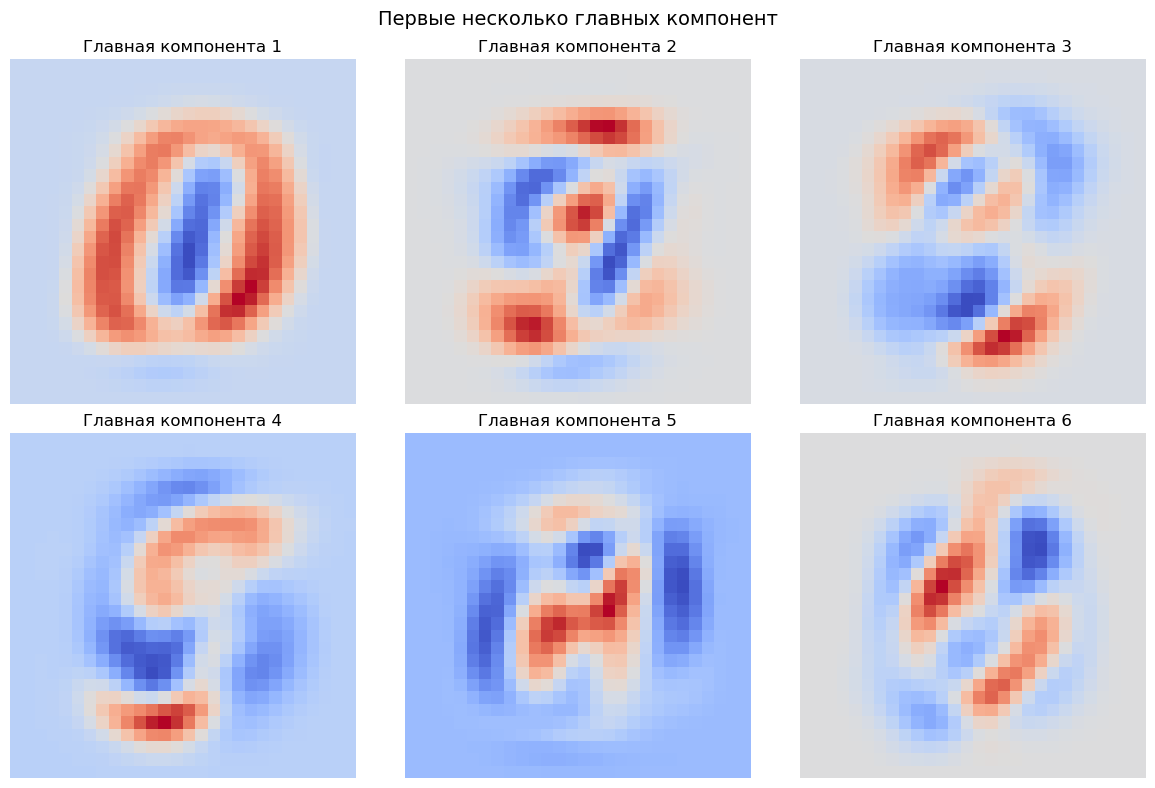


Анализ ошибочных предсказаний...
Найдено 312 ошибочных предсказаний
Показываем 6 примеров:


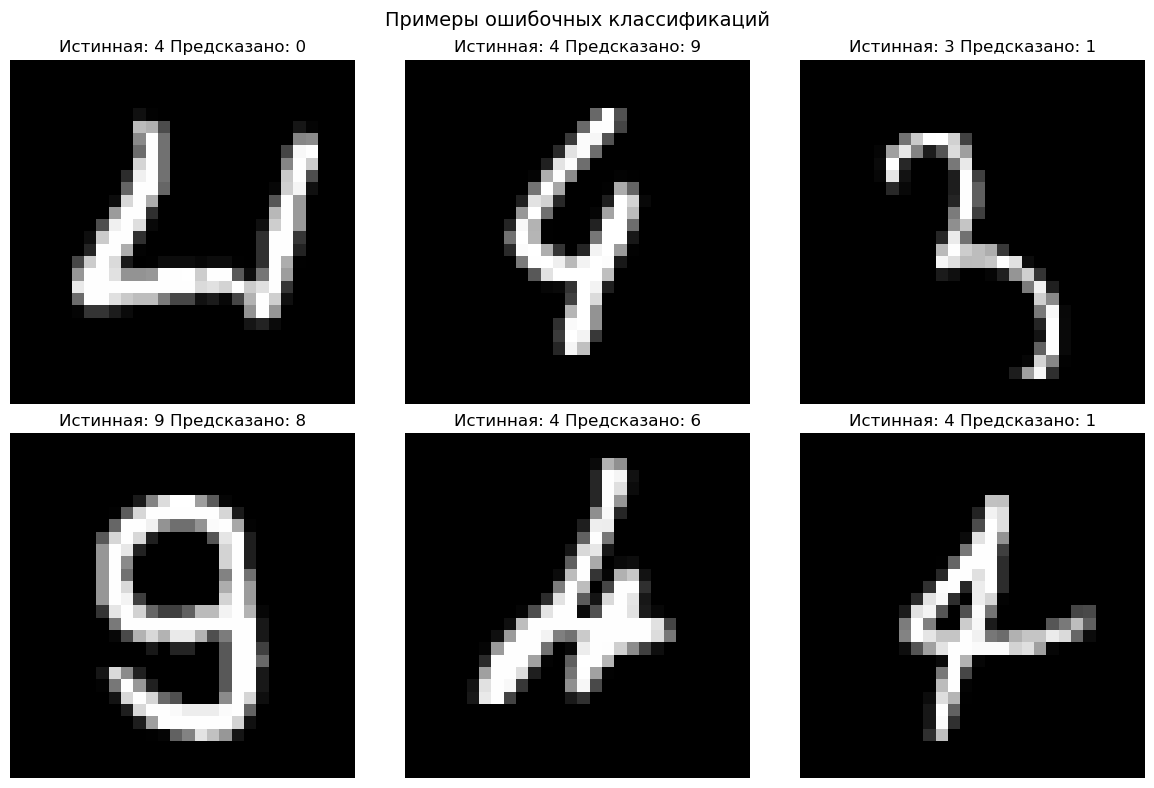

In [21]:
# Визуализация первых нескольких главных компонент
print("Визуализация нескольких главных компонент...")
component_count = min(16, pca_transformer.components_.shape[0])
components_to_show = 6

# Создаем новую фигуру для главных компонент
fig3, axes_components = plt.subplots(2, 3, figsize=(12, 8))
axes_components = axes_components.flatten()

for component_idx in range(components_to_show):
    component_image = pca_transformer.components_[component_idx].reshape(28, 28)
    axes_components[component_idx].imshow(component_image, cmap="coolwarm")
    axes_components[component_idx].set_title(f"Главная компонента {component_idx + 1}")
    axes_components[component_idx].axis("off")  # ✅ Исправлено: круглые скобки

plt.suptitle("Первые несколько главных компонент", fontsize=14)
plt.tight_layout()
plt.show()

# Визуализация примеров ошибочных предсказаний
print("\nАнализ ошибочных предсказаний...")
error_indices = np.where(predictions_full != labels_test)[0]
error_count_to_show = min(6, len(error_indices))

if error_count_to_show > 0:
    print(f"Найдено {len(error_indices)} ошибочных предсказаний")
    print(f"Показываем {error_count_to_show} примеров:")

    fig4, axes_errors = plt.subplots(2, 3, figsize=(12, 8))
    axes_errors = axes_errors.flatten()

    for plot_idx, error_idx in enumerate(error_indices[:error_count_to_show]):
        axes_errors[plot_idx].imshow(images_test_reshaped[error_idx], cmap="gray")
        axes_errors[plot_idx].set_title(
            f"Истинная: {labels_test[error_idx]} Предсказано: {predictions_full[error_idx]}"
        )
        axes_errors[plot_idx].axis("off")

    plt.suptitle("Примеры ошибочных классификаций", fontsize=14)
    plt.tight_layout()
    plt.show()

else:
    print("\nВсе предсказания верны!")

## График сравнения точности и времени


Создание сравнительных графиков...


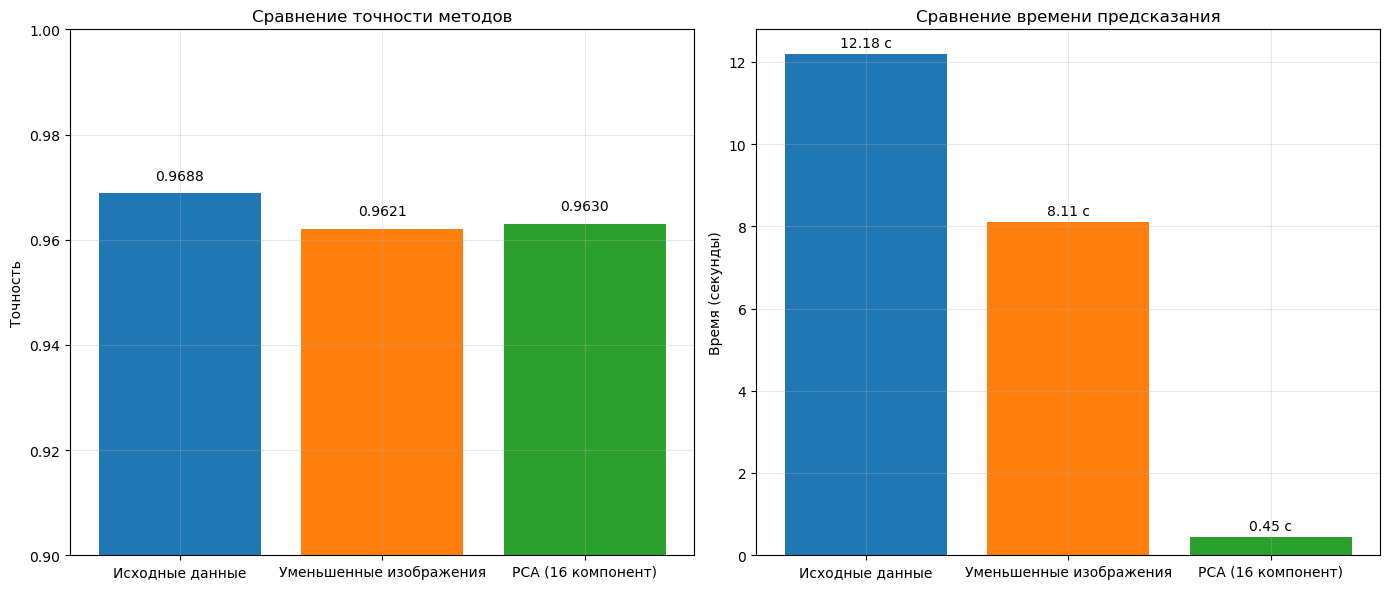

In [22]:
print("\nСоздание сравнительных графиков...")

fig5, (ax5a, ax5b) = plt.subplots(1, 2, figsize=(14, 6))

# График точности
methods = comparison_data["Метод"]
accuracies = comparison_data["Точность"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

bars1 = ax5a.bar(methods, accuracies, color=colors)
ax5a.set_ylabel('Точность')
ax5a.set_title('Сравнение точности методов')
ax5a.set_ylim([0.9, 1.0])
ax5a.grid(True, alpha=0.3)

# Добавление значений на столбцы
for bar, acc in zip(bars1, accuracies):
    height = bar.get_height()
    ax5a.text(bar.get_x() + bar.get_width()/2., height + 0.002,
             f'{acc:.4f}', ha='center', va='bottom')

# График времени выполнения
times = comparison_data["Время (сек)"]
bars2 = ax5b.bar(methods, times, color=colors)
ax5b.set_ylabel('Время (секунды)')
ax5b.set_title('Сравнение времени предсказания')
ax5b.grid(True, alpha=0.3)

# Добавление значений на столбцы
for bar, t in zip(bars2, times):
    height = bar.get_height()
    ax5b.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{t:.2f} с', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Итог

In [23]:
print("\n1. ЭФФЕКТИВНОСТЬ УМЕНЬШЕНИЯ РАЗМЕРНОСТИ:")
print(f"   • PCA позволяет сократить признаки с 784 до 16 (в 49 раз)")
print(f"   • Уменьшение изображений сокращает признаки с 784 до 196 (в 4 раза)")

print("\n2. ВЛИЯНИЕ НА ПРОИЗВОДИТЕЛЬНОСТЬ:")
print(f"   • PCA ускоряет предсказание в {duration_full/duration_pca:.1f} раз")
print(f"   • Уменьшение изображений ускоряет в {duration_full/duration_small:.1f} раз")

print("\n3. ВЛИЯНИЕ НА ТОЧНОСТЬ:")
print(f"   • Потери точности при PCA: {(accuracy_full - accuracy_pca)*100:.2f}%")
print(f"   • Потери точности при уменьшении: {(accuracy_full - accuracy_small)*100:.2f}%")

print("\n4. РЕКОМЕНДАЦИИ:")
print(f"   • Для максимальной точности: использовать исходные данные")
print(f"   • Для баланса скорости/точности: использовать уменьшенные изображения")
print(f"   • Для максимальной скорости: использовать PCA")



1. ЭФФЕКТИВНОСТЬ УМЕНЬШЕНИЯ РАЗМЕРНОСТИ:
   • PCA позволяет сократить признаки с 784 до 16 (в 49 раз)
   • Уменьшение изображений сокращает признаки с 784 до 196 (в 4 раза)

2. ВЛИЯНИЕ НА ПРОИЗВОДИТЕЛЬНОСТЬ:
   • PCA ускоряет предсказание в 27.4 раз
   • Уменьшение изображений ускоряет в 1.5 раз

3. ВЛИЯНИЕ НА ТОЧНОСТЬ:
   • Потери точности при PCA: 0.58%
   • Потери точности при уменьшении: 0.67%

4. РЕКОМЕНДАЦИИ:
   • Для максимальной точности: использовать исходные данные
   • Для баланса скорости/точности: использовать уменьшенные изображения
   • Для максимальной скорости: использовать PCA
